<a href="https://colab.research.google.com/github/rashzayn/ML-Projects/blob/main/Edge_Detection_Techniques_for_Face_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


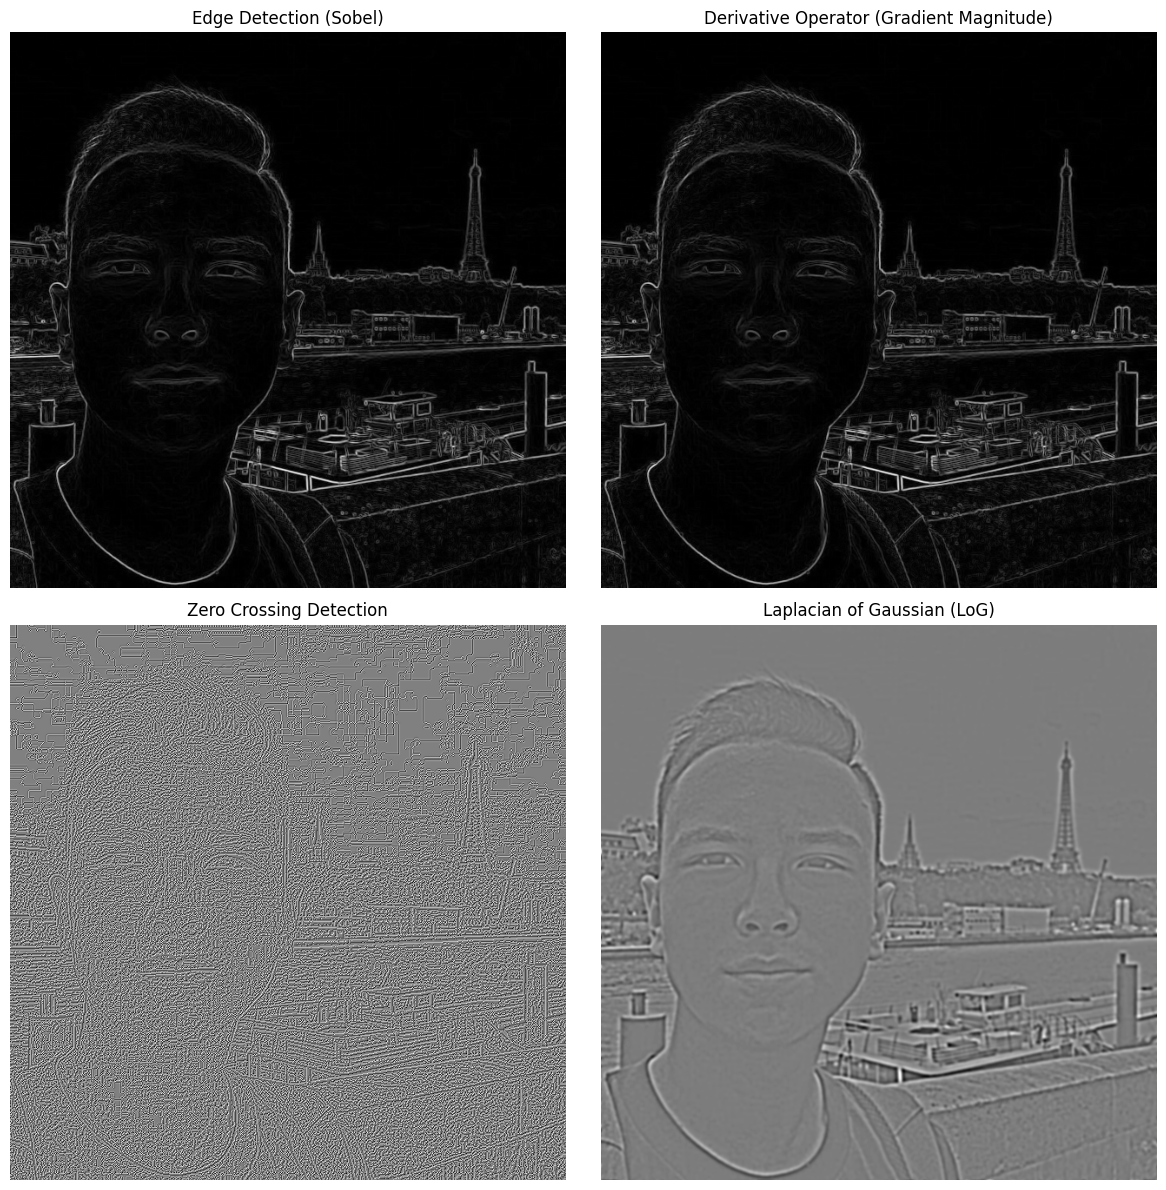

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive
from skimage import color, filters

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

def process_image(image_path):
    # Open the image
    img = Image.open(image_path)

    # Convert image to RGB if it's not already
    img = img.convert('RGB')

    # Convert to grayscale
    gray_image = color.rgb2gray(np.array(img))

    # Edge detection (Sobel)
    edges_sobel = filters.sobel(gray_image)

    # Derivative operator (Gradient magnitude)
    gradient_x = filters.sobel_h(gray_image)
    gradient_y = filters.sobel_v(gray_image)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    # Zero Crossing Detection (Laplacian)
    laplacian = filters.laplace(gray_image)
    zero_crossings = np.zeros_like(laplacian)
    zero_crossings[:-1, :] = np.diff(np.sign(laplacian), axis=0)
    zero_crossings[:, :-1] += np.diff(np.sign(laplacian), axis=1)

    # Laplacian of Gaussian (LoG)
    log = filters.gaussian(gray_image, sigma=2)
    log = filters.laplace(log)

    # Display results
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    ax = axes.ravel()

    ax[0].imshow(edges_sobel, cmap='gray')
    ax[0].set_title('Edge Detection (Sobel)')

    ax[1].imshow(gradient_magnitude, cmap='gray')
    ax[1].set_title('Derivative Operator (Gradient Magnitude)')

    ax[2].imshow(zero_crossings, cmap='gray')
    ax[2].set_title('Zero Crossing Detection')

    ax[3].imshow(log, cmap='gray')
    ax[3].set_title('Laplacian of Gaussian (LoG)')

    for a in ax:
        a.axis('off')

    plt.tight_layout()
    plt.show()

# Usage
image_path = '/content/drive/MyDrive/Colab Notebooks/picture 2.jpg'  # Update this path to match your image location
process_image(image_path)